## MATH4570 Project: Data Analysis and Models

<b>Team</b>: Chia Hsu, Alec Bulkin, Angela Wu, Emily Gu, Brendan Clarke, Bridget Foote

## Introduction: Heart Attack Analysis

Heart disease is the number one leading cause of death for both men and women in the United States, the most common of which being coronary artery disease and every year, about 610,000 people die of heart disease in the United States. This project's goal is to analyze factors such as age, sex, cholestrol, and blood sugar in order label or classify patients who have a high risk of having a heart attack. In this project we will use `Logistic Regression`, `K Nearest Neighbors` and `Neural Networks` in order to classify patients at a risk.

###### Dataset
The project uses a Kaggle dataset with 15 columns and 303 rows where each row represents a different patient. Below you can find more information about the features and the dataset.
Link to kaggle dataset: [dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Description of the features:
1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect
14. O sat: oxygen saturation level.
15. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

###### Helper Functions and Handlers

Below we define some functions that will facilitate the analysis of the data and each of the model's performance. The first function will plot a confusion matrix given the true label and the predictions from a model. The second function cross validates the given input features and returns a cross validated prediction on the data. 

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plots a confusion matrix.
def plot_confusion(y_true, y_pred):
    """Plots a confusion matrix given the label and prediction."""
    
    # set plot font and style.
    sns.set(font_scale = 1.4)

    # plot the confusion matrix.
    conf_mat = confusion_matrix(y_true, y_pred)
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
    conf_mat_disp.plot()

    # set confusion matrix shape.
    plt.gcf().set_size_inches(5, 5)
    plt.grid(False)
    plt.show()

In [2]:
from sklearn.model_selection import StratifiedKFold

# gets the prediction for the data using cross validation.
def cross_validate(x, y_true, model):
    """Cross validates the data."""
    
    # set the number of folds for corss validation.
    kfold = StratifiedKFold(n_splits=10)

    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x, y_true):

        # index to split training / test data
        x_train = x[train_idx, :]
        x_test = x[test_idx, :]
        y_train = y[train_idx]

        # fit the model.
        model.fit(x_train, y_train)

        # estimate each penguin's species
        y_pred[test_idx] = model.predict(x_test)
    
    return y_pred

In [3]:
from sklearn.metrics import classification_report

def get_report(y_true, y_pred):
    """Prints the classification report."""

    print('Classification Report: \n')
    print(classification_report(y_true, y_pred))
    print('1: At Risk, 2: Not At Risk')

## Data Exploration and Visualization
Now we will load in the data and have a look at the features and existing relationships.

In [4]:
import pandas as pd

# importing the data into a dataframe.
path = '/Users/chiahaohsutai/Documents/University/NEU S2022/Matrix Methods for ML/Project/data/'

df_heart = pd.read_csv(path + 'heart.csv')
df_saturation = pd.read_csv(path + 'o2Saturation.csv', header=None)
df_saturation.columns = ['O Saturation']

# appending information together.
df_heart.insert(13, 'O Sat', df_saturation.iloc[:, 0], True)

In [5]:
# view of the data and features.
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O Sat,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.6,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,98.1,1


In [6]:
# dimension of the dataset.
df_heart.shape

(303, 15)

The plot below shows the relationships between the numerical features in the dataset. 

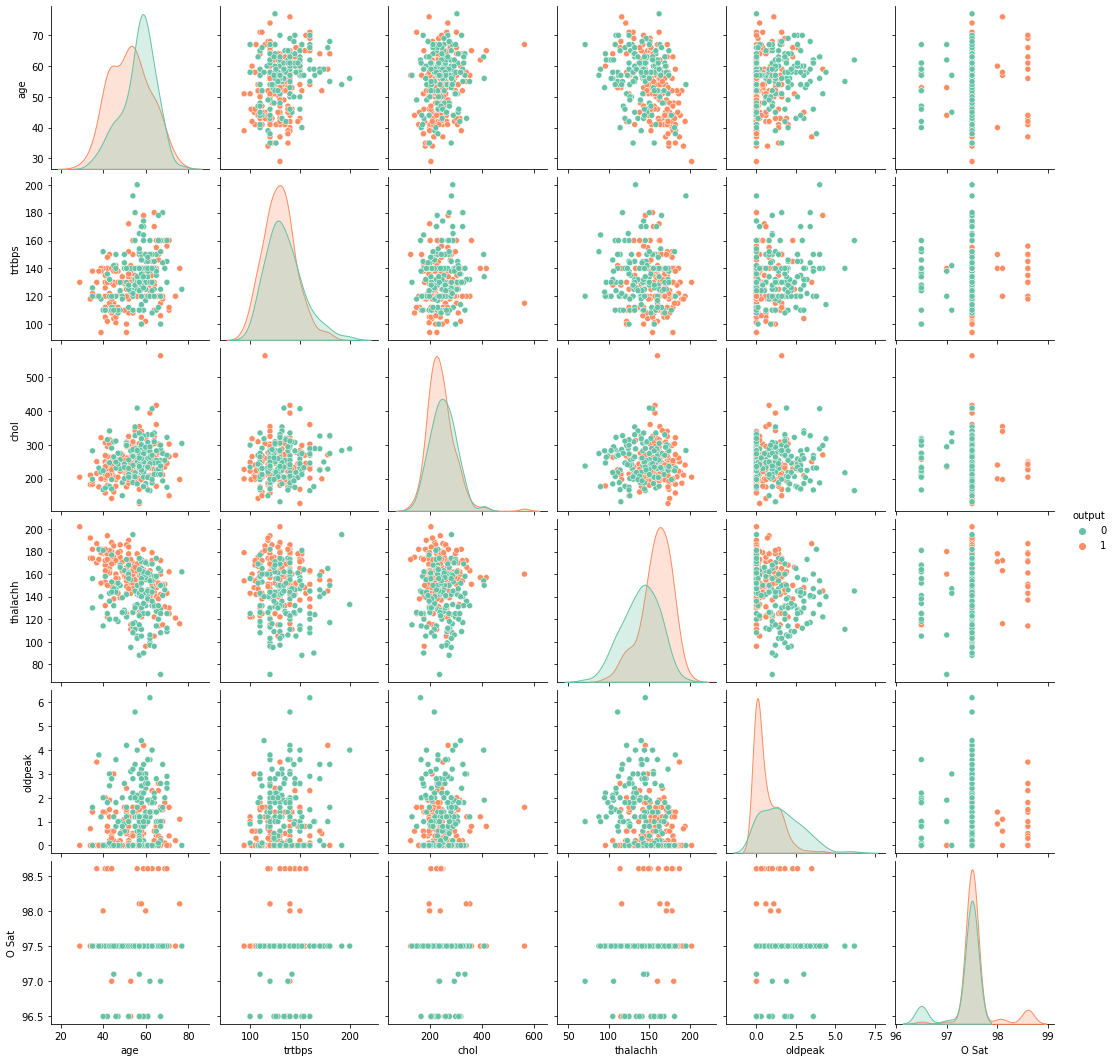

In [7]:
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'O Sat', 'output']
sns.pairplot(df_heart[num_cols], hue='output', palette='Set2')
plt.show()

Below you can see a heat map with all the features in comparison to each other. This is an initial view at the data and the existing relationships.

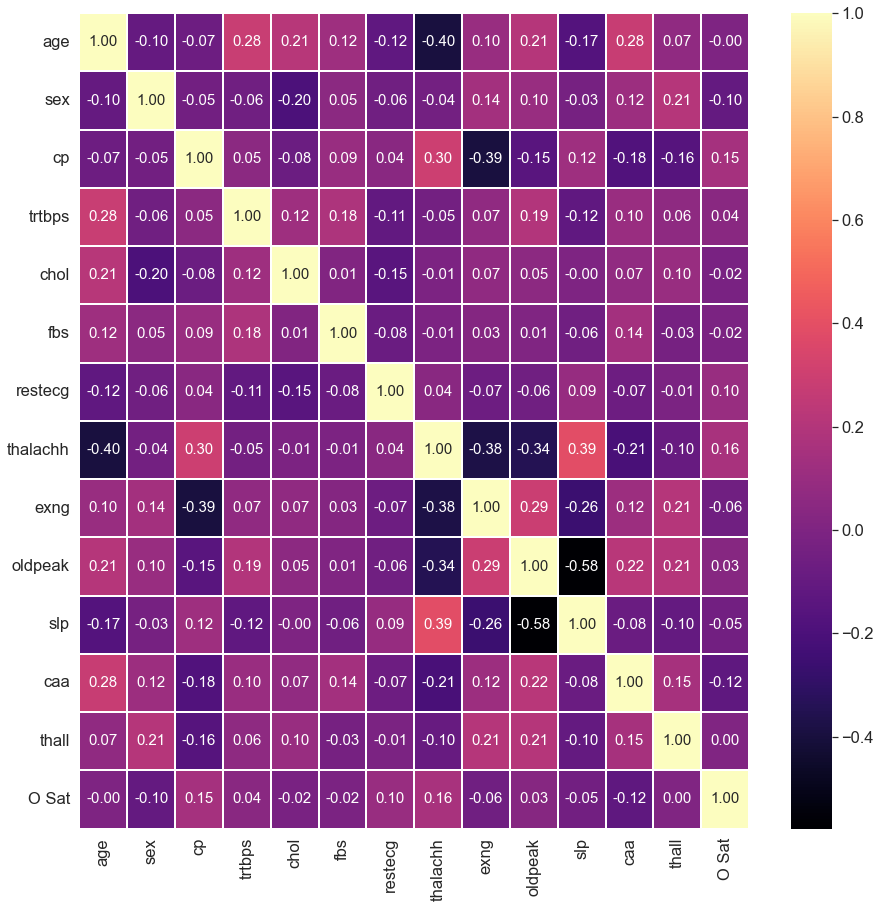

In [8]:
sns.set(font_scale=1.5)

# make the plot and set size of axis labels.
fig, ax = plt.subplots(figsize=(15, 15))
df = df_heart.drop(columns=['output'])

sns.heatmap(df.corr(), ax=ax, linewidths=0.07, cmap="magma", annot=True, 
            fmt='.2f', annot_kws={'fontsize':15})

# show the correlation map.
plt.show()

In [9]:
from collections import Counter

# counts the number of at risk and healthy (not at risk).
Counter(df_heart['output'].values)

Counter({1: 165, 0: 138})

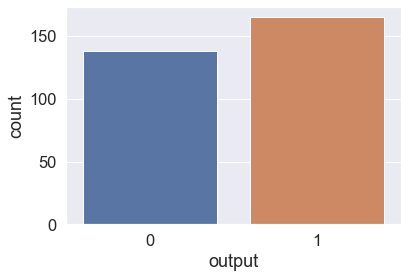

In [10]:
sns.countplot(x="output", data=df_heart)
plt.show()

The plot above shows the number of patients at risk and the number patients that are healthy. The are a total of 165 patients that were labeled at risk and 138 patients that were label as healthy. This means that 54% of the samples are labeled as risky and 46% of the samples are healthy.

## Data Normalization and Cleanning

In the following cells we normalized the data and use one hot enconding to convert the categorical data into a numerical feature representation.

In [11]:
# feautres with quantitative data.
quant_cols = ['trtbps','chol','thalachh', 'O Sat', 'oldpeak']

# normalize the data points.
for col in quant_cols:
    curr = df_heart[col]
    df_heart[col] = (curr - curr.mean()) / curr.std()

df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,O Sat,output
0,63,1,3,0.762694,-0.255910,1,0,0.015417,0,1.085542,0,0,1,3.163236,1
1,37,1,2,-0.092585,0.072080,0,1,1.630774,0,2.119067,0,0,2,3.163236,1
2,41,0,1,-0.092585,-0.815424,0,0,0.975900,0,0.310399,2,0,2,3.163236,1
3,56,1,1,-0.662770,-0.198030,0,1,1.237849,0,-0.206364,2,0,2,3.163236,1
4,57,0,0,-0.662770,2.078611,0,1,0.582975,1,-0.378618,2,0,2,1.745395,1


In [12]:
# columns to one hot encode.
columns = ['sex', 'cp', 'fbs', 'restecg', 
           'exng', 'slp', 'caa', 'thall']

# one hot enconde the columns.
df_heart = pd.get_dummies(df_heart, columns=columns)

In [13]:
df_heart

,age,trtbps,chol,thalachh,oldpeak,O Sat,output,sex_0,sex_1,cp_0,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,0.762694,-0.255910,0.015417,1.085542,3.163236,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,-0.092585,0.072080,1.630774,2.119067,3.163236,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,-0.092585,-0.815424,0.975900,0.310399,3.163236,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56,-0.662770,-0.198030,1.237849,-0.206364,3.163236,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,-0.662770,2.078611,0.582975,-0.378618,1.745395,1,1,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.477601,-0.101562,-1.163356,-0.723126,0.043986,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
299,45,-1.232956,0.342190,-0.770432,0.138144,0.043986,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,0.705675,-1.027653,-0.377507,2.032940,0.043986,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
301,57,-0.092585,-2.223854,-1.512623,0.138144,0.043986,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


## Modelling and Results

The next section displays all the modelling and results for the project. As stated in the introduction, the project uses `Logistic Regression`, `K Nearest Neighbors` and `Neural Networks` in order to classify patients at a risk. The models below all utilize cross validation and display the results in a confusion matrix.

## Logistic Regression.

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# get the features and label.
x = df_heart.drop(columns=['output'])
y = df_heart['output']
data = x.values
label = y.values

# fit the data using cross validation.
clf = LogisticRegression(max_iter=3000)
y_pred = cross_validate(data, label, clf)

In [15]:
from sklearn.metrics import accuracy_score

# getting the accuracy of the model.
acc = accuracy_score(label, y_pred)
print(f'Logistic Regression Score: {acc}')

Logistic Regression Score: 0.8613861386138614


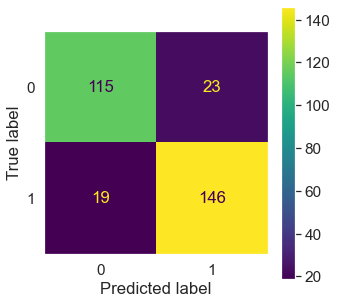

In [16]:
plot_confusion(label, y_pred)

In [17]:
# get the column names and corresponding coefficient.
feats_names = x.columns
coef = clf.coef_.reshape(-1)

# get the coefficients and sort them in decreasing order.
feat_importances = list(zip(feats_names, abs(coef)))
feat_importances.sort(key=lambda y: y[1], reverse=True)

# get the two most important features.
feat_1 = feat_importances[0][0]
feat_2 = feat_importances[1][0]

print(f'The most important feature is {feat_1} and ' \
      f'the second most important feature is {feat_2}')

The most important feature is caa_0 and the second most important feature is cp_0


The graph below displays the 5 most important fearues in the regression.

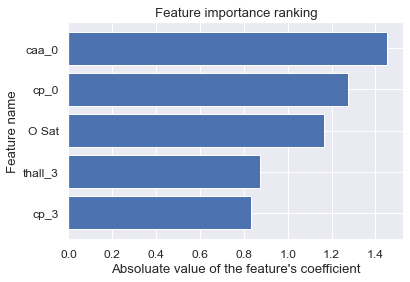

In [18]:
sns.set(font_scale=(1.1))

# get the column names and corresponding coefficients.
cols = [feat[0] for feat in feat_importances]
coefs = [coef[1] for coef in feat_importances]
cols.reverse()
coefs.reverse()

# limit the list to 5 features.
names = cols[-5:]
values = coefs[-5:]

plt.barh(names, values)
plt.title('Feature importance ranking')
plt.ylabel("Feature name")
plt.xlabel("Absoluate value of the feature's coefficient")
plt.show()

In [19]:
get_report(label, y_pred)

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       138
           1       0.86      0.88      0.87       165

    accuracy                           0.86       303
   macro avg       0.86      0.86      0.86       303
weighted avg       0.86      0.86      0.86       303

1: At Risk, 2: Not At Risk


## KNN Classifier

For the KNN classifier, we will optimize the K value by iterating and cross validating the data for different K values. Then we will extract the K value with the highest cross validated accuracy score.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# stores the scores of the model.
scores = list()

for k in range(1, 100):
    # create the model.
    model = KNeighborsClassifier(n_neighbors=k)

    # run cross validation and get the score
    y_pred = cross_validate(data, label, model)
    scores.append(accuracy_score(label, y_pred))

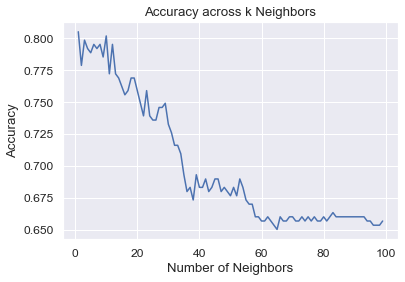

In [21]:
plt.plot(range(1, 100), scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy across k Neighbors')
plt.show()

In the plot above, we observe that the KNN classifier performs best with an extremely low number of nearest neighbors, with performance diminishing as K approaches 60 and beyond.

In [22]:
index_max = np.array(scores).argmax()
k = range(1, 40)[index_max]

print(f'The best K was {k} and the score was {scores[index_max]}')

The best K was 1 and the score was 0.8052805280528053


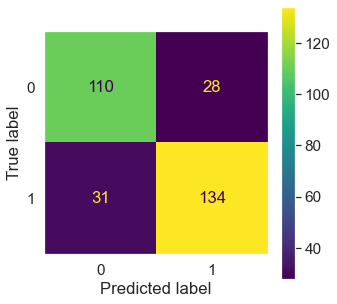

In [23]:
model = KNeighborsClassifier(n_neighbors=k)

# run cross validation and get the score
y_pred = cross_validate(data, label, model)

plot_confusion(label, y_pred)

In [24]:
get_report(label, y_pred)

Classification Report: 

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       138
           1       0.83      0.81      0.82       165

    accuracy                           0.81       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.81      0.81      0.81       303

1: At Risk, 2: Not At Risk


## Neural Network Classification

In [53]:
# stop tensor flow from printing warning msgs. 
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [54]:
from pandas import read_csv

from keras import backend
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.backend import clear_session
from keras.callbacks import Callback
from keras.utils.vis_utils import plot_model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

For our neural network we utilized `Gradient Descent` and `Adam` as our optimizers. Moroever, we will try to optmize the number of layers in the model by evaluating models with layers between 1 and 10.

In [55]:
# we create 10 different models (each with a different number of layers).
models = list()

# create a model for 1 - 10 layers.
for idx in range(1, 11):
    model = Sequential()
    
    for l in range(1, idx):
        model.add(Dense(20, activation='relu'))
        
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=0.0001),
                  metrics=["accuracy"])
    
    models.append(model)

###### Helper Functions and Handlers

In [28]:
K = backend

class ExponentialLearningRate(Callback):
    """Updates the learning rate for the model."""
    
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [29]:
def clear(seed=42):
    """Clears the current model and sets the random seed"""
    
    clear_session()
    np.random.seed(42)
    set_seed(42)

In [30]:
def cross_validate_nn(model, data, label, splits=10, epochs=50, batch_size=1):
    """Cross validates an NN model."""
    clear()
    
    # creates an estimator using the given model.
    estimator = KerasClassifier(model=model, 
                                epochs=epochs, 
                                batch_size=batch_size, 
                                verbose=0)
    
    # cross validates the data.
    kfold = StratifiedKFold(n_splits=splits)
    val = cross_val_score(estimator, data, label, cv=kfold).mean()
    print(f'The cross validated accuracy score was {val:.5f}')

In [31]:
def evaluate_models(model, opt, train_test, epochs=50):
    """Evaluates the given models."""
    
    # get the tranning and testing splits.
    X_train, X_test, y_train, y_test = train_test
    
    # compile the new model with the optimized learning rate.
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=["accuracy"])

    # fit the model. 
    hist = model.fit(X_train, y_train, epochs=epochs, 
                     validation_data=(X_test, y_test), 
                     verbose=0);

    # evaluate the model.
    evaluation = model.evaluate(X_test, y_test)
    
    return evaluation, hist

In [32]:
def plot_metrics(history):
    """Plots the metrics for the history of the model."""

    # plot the history.
    pd.DataFrame(history.history).plot(figsize=(8, 7))
    plt.grid(True)
    plt.xlabel('Epoch #')
    plt.show()

In [33]:
def plot_sub_metrics(history):
    """Plots the accuracy and loss for the given model."""
    
    # plotting the metrics
    fig = plt.figure(figsize=(10, 5))
    metrics_values = [('accuracy','val_accuracy'), ('loss', 'val_loss')]
    
    # plot all the metric together.
    for idx, metric in enumerate(metrics_values):
        plt.subplot(2,1,idx + 1)

        # get the metric and plot it.
        plt.plot(history.history[metric[0]])
        plt.plot(history.history[metric[1]])

        # set the title and acis labels.
        plt.gca().title.set_text(f'model {metric[0]}') 
        plt.ylabel(f'{metric[0]}')
        plt.xlabel('# epoch')
        plt.legend(['train', 'test'], loc='lower right')

    # show the plot.
    plt.tight_layout()
    plt.show()

In [52]:
def get_lr(model, train_test, epochs=50):
    """Gets the best learning rate for the model."""
    
    # get the test and train split. 
    X_train, X_test, y_train, y_test = train_test
    
    # optimize the learning rate.
    expon_lr = ExponentialLearningRate(factor=1.005)
    history = model.fit(X_train, y_train, epochs=epochs, 
                        validation_data=(X_test, y_test),
                        callbacks=[expon_lr],
                        verbose=0);
    
    # get the best learning rate for the model.
    min_loss = np.argmin(expon_lr.losses)
    op_lr = expon_lr.rates[min_loss]
    
    return op_lr

## Neural Network Using Gradient Descent

For gradient descent we must first optimize the learning rate for each model. Hence, we iterate over the models and optimize for each learning rate.

In [56]:
sns.set()

# get train and test split.
train_test = train_test_split(data, label, test_size=0.2, random_state=0)

# store the model and its best learning rate.
model_lr = dict()

# optmize the learning rates.
for m in models:
    clear()
    op_lr = get_lr(m, train_test)
    model_lr[m] = op_lr

Next, we evaluate each of the models using their corresponding optimized learning rate. 

In [57]:
model_score = dict()
histories = list()

# evalute each model. 
for model, lr in model_lr.items():
    clear()
    
    # evalute the model and get the history.
    evaluation, hist = evaluate_models(model, SGD(learning_rate=lr), train_test)
    
    # store the evaluations.
    model_score[model] = evaluation
    histories.append(hist)

2/2 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.6066


Now we extract the best model from the evaluation step and visualize the loss and accuracy of the model.

In [58]:
# get the evalutions in a list.
loss_acc = list(model_score.values())
scores = map(lambda a : a[1], loss_acc)

# get the model with the best score.
max_score = np.argmax(list(scores))
best_model = list(model_score.keys())[max_score]

In [59]:
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                640       
                                                                 
 dense_28 (Dense)            (None, 20)                420       
                                                                 
 dense_29 (Dense)            (None, 20)                420       
                                                                 
 dense_30 (Dense)            (None, 20)                420       
                                                                 
 dense_31 (Dense)            (None, 20)                420       
                                                                 
 dense_32 (Dense)            (None, 20)                420       
                                                                 
 dense_33 (Dense)            (None, 10)               

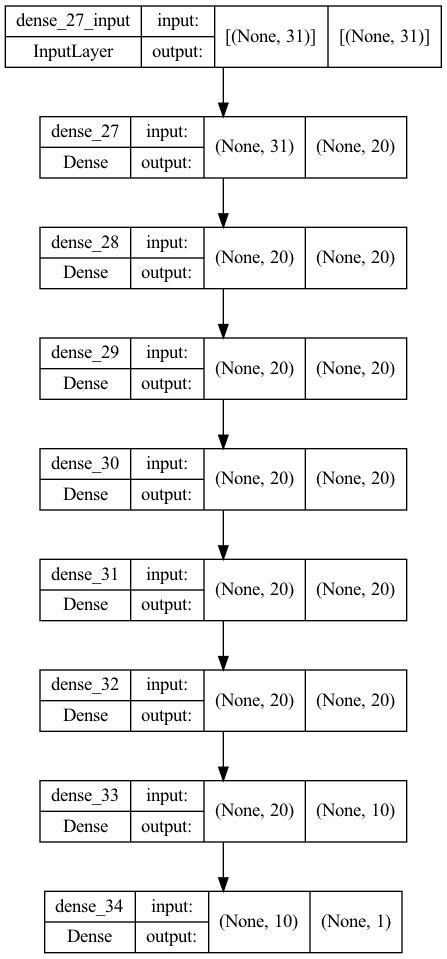

In [60]:
plot_model(best_model, show_shapes=True)

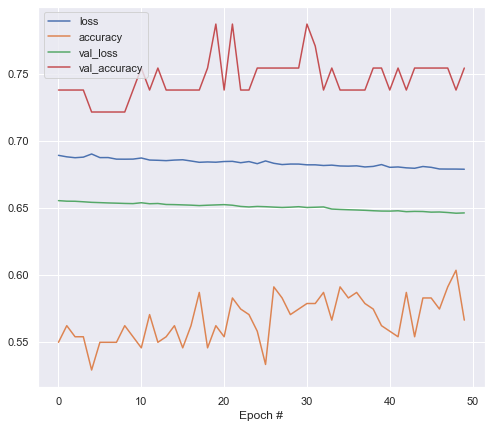

In [61]:
# get the history of the model with the best score.
history = histories[max_score]

# plot the loss and accuarcy for the test and trainning.
plot_metrics(history)

As seen in the visualization above, the neural network is likely overfitted, due to it significantly overperforming on the validation set.

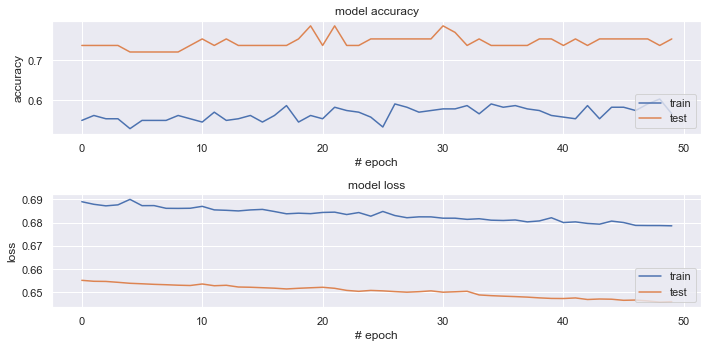

In [62]:
# plot the accuracy and loss separately.
plot_sub_metrics(history)

In [43]:
# get the model's score with cross validation.
cross_validate_nn(best_model, data, label)

INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmphgmkg8t5/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmp3f6nuf2h/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpt_s0s7os/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpsd1t31z1/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpx7r83u_c/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmp8drd1_m4/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpx_a3_xmr/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmp20_mqukh/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpcec60r8d/assets
INFO:tensorflow:Ass

## Neural Network Using Adam

For the `Adam` optimizer we follow the same procedure as for the `Gradient Descent`.

In [63]:
sns.set()

# get train and test split.
train_test = train_test_split(data, label, test_size=0.2, random_state=0)

# store the model and its best learning rate.
model_lr = dict()

# optmize the learning rates.
for m in models:
    clear()
    op_lr = get_lr(m, train_test)
    model_lr[m] = op_lr

In [64]:
model_score = dict()
histories = list()

# evalute each model. 
for model, lr in model_lr.items():
    clear()
    
    # evalute the model and get the history.
    evaluation, hist = evaluate_models(model, Adam(learning_rate=lr), train_test)
    
    # store the evaluations.
    model_score[model] = evaluation
    histories.append(hist)

2/2 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.8689


Even at this point in the modelling process, we observe a noticeably higher average accuracy across the models using `Adam` vs `Gradient Descent`.

In [65]:
# get the evalutions in a list.
loss_acc = list(model_score.values())
scores = map(lambda a : a[1], loss_acc)

# get the model with the best score.
max_score = np.argmax(list(scores))
best_model = list(model_score.keys())[max_score]

In [66]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


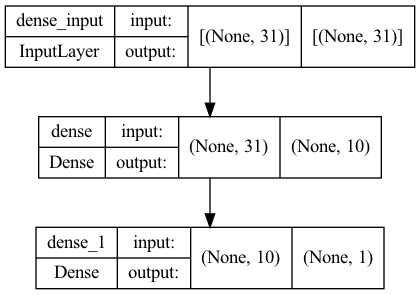

In [67]:
plot_model(best_model, show_shapes=True)

As seen above, when compared to the `Gradient Descent` best model, the `Adam` best model is structurally less complex.

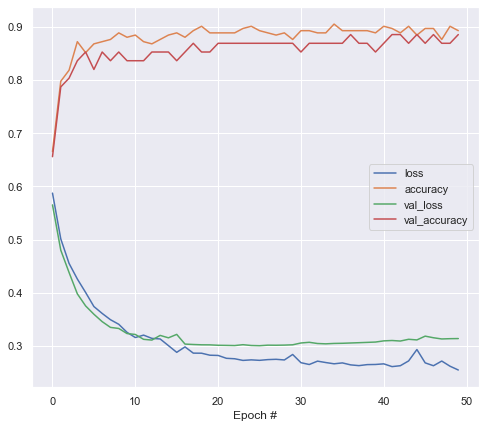

In [68]:
# get the history of the model with the best score.
history = histories[max_score]

# plot the loss and accuarcy for the test and trainning.
plot_metrics(history)

From the plot of performance metrics above, we observe that the optimized `Adam` model isn't overfitted, and still manages to outperform the optimized `Gradient Descent` model.

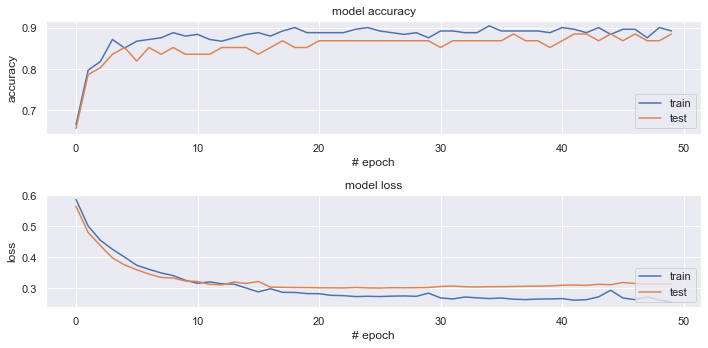

In [69]:
# plot the accuracy and loss separately.
plot_sub_metrics(history)

In [50]:
# get the model's score with cross validation.
cross_validate_nn(best_model, data, label)

INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmptlv0tz5z/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpa00mu0yc/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpp861s23p/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpzwoanu2x/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmp7kh4jwt_/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmp_qchu5i0/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpf8l8lq8t/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmpm2kqqacu/assets
INFO:tensorflow:Assets written to: ram:///var/folders/mr/9kjrnw6d4xqbg5tvgd6h14540000gn/T/tmp7lad7ggl/assets
INFO:tensorflow:Ass

# Conclusion

From our investigation of the Heart Attack classification dataset, we tried to solve the prediction problem using 4 different models: `Logistic Regression`, `K Nearest Neighbors` and 2 `Neural Networks` using the `Adam` and `Gradient Descent` optimizers.

Ultimately, the results of fitting these models were promising across the board, with each boasting a testing / validation accuracy above 80%. However, among the four models we found that `Logistic Regression` (with 3000 max_iterations) and the `Adam Optimized Neural Network` performed best, with accuracy scores of 0.8614 and 0.84839, respectively. Thus, we would recommend using either of these two top models when it comes to effectively assessing patients' risk of having a heart attack.